In [4]:
import transformers
import pandas
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [54]:
dt = pandas.read_csv("./tmdb_5000_movies.csv")
mask = dt['overview'].isna()
mask = [not x for x in mask]
d2 = dt[mask]

In [6]:
# tokenizer = transformers.GPT2Tokenizer.from_pretrained("gpt2")
# model = transformers.GPT2Model.from_pretrained("gpt2", return_dict=True)
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-cased")
model = transformers.BertModel.from_pretrained("bert-base-cased")

In [56]:
sens = list(d2['overview'])

In [57]:
tokenizer.pad_token = tokenizer.eos_token

tokenizer.add_special_tokens({'pad_token': '[PAD]'})

enc = tokenizer(sens, padding=True, return_tensors="pt")

Using eos_token, but it is not set yet.


In [ ]:
from datetime import datetime
start = datetime.now()

out = model(enc['input_ids'], attention_mask = enc['attention_mask'], return_dict=True)
end = datetime.now()
end - start

In [26]:
lhs = out['pooler_output'].detach().numpy()
# lhs = out[0].detach().numpy()

In [27]:
lhs

array([[ 0.06371254, -0.04802618,  0.96098226, ...,  0.9906387 ,
        -0.9373098 ,  0.58513033],
       [-0.3419822 ,  0.20904222,  0.9974715 , ...,  0.99919367,
        -0.81260073,  0.9107971 ],
       [-0.58617365,  0.41021276,  0.99931663, ...,  0.99974036,
        -0.7170873 ,  0.9573315 ],
       ...,
       [-0.17770004,  0.14058092,  0.9913978 , ...,  0.9979847 ,
        -0.9325882 ,  0.8186978 ],
       [-0.3914767 ,  0.3004686 ,  0.9991655 , ...,  0.9997034 ,
        -0.77950317,  0.9481298 ],
       [-0.24988607,  0.13984917,  0.9929606 , ...,  0.998342  ,
        -0.9122104 ,  0.88377833]], dtype=float32)

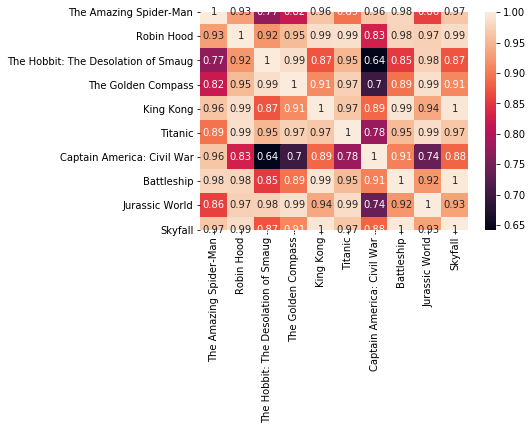

In [28]:
lhs2 = out["pooler_output"].detach()
sim2 = cosine_similarity(lhs2)
sns.heatmap(sim2, annot=True, xticklabels = d2['original_title'], yticklabels = d2['original_title'])

In [18]:
d2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
11,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/view/movie/234/Quantum-of-S...,10764,"[{""id"": 627, ""name"": ""killing""}, {""id"": 1568, ...",en,Quantum of Solace,Quantum of Solace continues the adventures of ...,107.928811,"[{""name"": ""Eon Productions"", ""id"": 7576}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-10-30,586090727,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"For love, for hate, for justice, for revenge.",Quantum of Solace,6.1,2965
12,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,58,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""JM"", ""name"": ""Jamaica""}, {""is...",2006-06-20,1065659812,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246
13,255000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-07-03,89289910,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.9,2311
14,225000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.manofsteel.com/,49521,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Man of Steel,A young boy learns that he has extraordinary p...,99.398009,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2013-06-12,662845518,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will believe that a man can fly.,Man of Steel,6.5,6359
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
17,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://disney.go.com/pirates/index-on-st

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge